In [13]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = np.genfromtxt('iris_regression.csv', delimiter=',', skip_header=1)

# get sepal (target)
sepal = data[:, 2]
print(sepal[:5])

# get features
features = data [:, :2]
print(features[:5])


# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, sepal, test_size=0.2, random_state=42)
N_train = len(X_train)

[5.1 4.9 4.7 4.6 5. ]
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [33]:
# L2 regularization parameter
lambda_l2 = 0.03 

# compute output and loss
def predict(x1, x2, w1, w2, b):
    return w1*x1 + w2*x2 + b

def compute_loss(y_hat, y, w1, w2, lambda_l2):
    return (y_hat - y)**2 + lambda_l2 * (w1**2 + w2**2)

# compute gradient
def compute_gradient_wi(xi, y, y_hat, wi, lambda_l2):
    dl_dwi = 2*xi*(y_hat-y) + 2*lambda_l2*wi
    return dl_dwi 

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi
    
def update_weight_b(b, dl_db, lr):    
    b  = b - lr*dl_db    
    return b

In [34]:
# initialize model's parameters
w1, w2, b = 5.0, -3.0, 0.0
print(w1, w2, b)

5.0 -3.0 0.0


In [35]:
epoch_max = 100000
lr = 0.01
losses = []

for epoch in range(epoch_max):    
    # some variables
    loss_total = 0.0
    
    dw1_total = 0.0
    dw2_total = 0.0
    db_total  = 0.0
    
    for i in range(N_train):
        # get a sample
        x1 = X_train[i, 0]
        x2 = X_train[i, 1]
        y  = y_train[i]
        
        # compute output 
        y_hat = predict(x1, x2, w1, w2, b)
        
        # compute loss
        loss = compute_loss(y, y_hat, w1, w2, lambda_l2)
        loss_total = loss_total + loss

        # compute gradient w1, w2, w3, b
        dl_dw1 = compute_gradient_wi(x1, y, y_hat, w1, lambda_l2)
        dl_dw2 = compute_gradient_wi(x2, y, y_hat, w2, lambda_l2)
        dl_db  = compute_gradient_b(y, y_hat)
        
        # accumulate
        dw1_total = dw1_total + dl_dw1
        dw2_total = dw2_total + dl_dw2
        db_total = db_total + dl_db


    # (after processing N samples) - update parameters
    w1 = update_weight_wi(w1, dl_dw1/N_train, lr)
    w2 = update_weight_wi(w2, dl_dw2/N_train, lr)
    b  = update_weight_b(b, dl_db/N_train, lr)

    # logging
    losses.append(loss_total/N_train) 

# after training
print(w1, w2, b)

2.264920305436631 -0.4925703257969943 1.5227187239097226


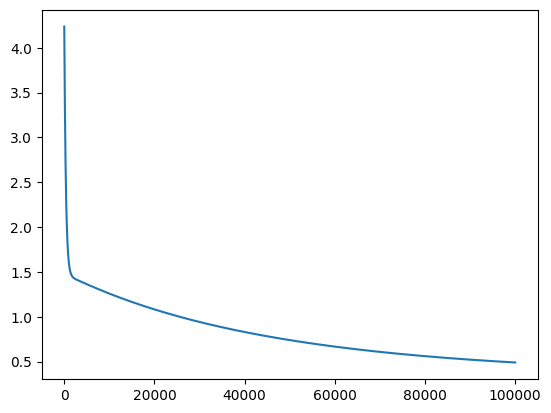

In [36]:
plt.plot(losses)
plt.show()

In [37]:
# Compute predictions and MSE for train data
y_train_pred = []
for i in range(N_train):
    x1 = X_train[i, 0]
    x2 = X_train[i, 1]
    y_hat = predict(x1, x2, w1, w2, b)
    y_train_pred.append(y_hat)

mse_train = np.mean((y_train - np.array(y_train_pred))**2)
print("Train MSE:", mse_train)


# Compute predictions and MSE for test data
y_test_pred = []
N_test = len(X_test)
for i in range(N_test):
    x1 = X_test[:, 0]
    x2 = X_test[:, 1]
    y_hat = predict(x1, x2, w1, w2, b)
    y_test_pred.append(y_hat)

mse_test = np.mean((y_test - np.array(y_test_pred))**2)
print("Test MSE:", mse_test)

Train MSE: 0.32900680836860535
Test MSE: 0.10725133966503453
